##Вариант 1 Шарапов МА ПМ21-4

Создайте датасет на основе файлов из архива sea_animals.zip. Разделите набор данных на обучающее и тестовое множество. Используя преобразования torchvision, приведите изображения к одному размеру и преобразуйте в тензоры.

Проверьте, является ли выборка сбалансированной. Выведите на экран долю каждого класса в обучающем и тестовом наборе данных.

Реализовав сверточную нейронную сеть при помощи библиотеки PyTorch, решите задачу классификации изображений без учета несбалансированности выборки. Отобразите confusion matrix и classification report, рассчитанные на основе обучающего и тестового множества.

Вариант 1.

Решите задачу задачу классификации, сэмплируя данные для обучения с учетом несбалансированности классов (используйте WeightedRandomSampler). Отобразите confusion matrix и classification report, рассчитанные на основе обучающего и тестового множества. В качестве веса объекта $i$-го класса используйте обратную частоту этого класса.

In [24]:
import zipfile
import torchvision.transforms.v2 as T
import torch as th
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
import torch.nn as nn
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/sea_animals.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()

In [ ]:
transform = T.Compose([
    T.ToTensor(),
    T.Resize((256, 256))
])

In [ ]:
papka = ImageFolder('sea_animals')
train_dataset, test_dataset = random_split(papka, [0.8, 0.2])

In [ ]:
train_dataset.dataset.transform = transform
test_dataset.dataset.transform = transform

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
features = len(papka.classes)
features

6

In [ ]:
papka = ImageFolder('sea_animals')
train_dataset, test_dataset = random_split(papka, [0.8, 0.2])

In [ ]:
train_dataset.dataset.transform = transform
test_dataset.dataset.transform = transform

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
features = len(papka.classes)
features

6

In [ ]:
import torch

# Возьмем одно изображение из набора данных
sample_image, _ = next(iter(train_loader))

# Передайдим его через сверточные и пулинговые слои
conv1 = nn.Conv2d(3, 6, kernel_size=3)
pool = nn.MaxPool2d(kernel_size=2)
flatten = nn.Flatten()

x = conv1(sample_image)
x = pool(x)
x = flatten(x)

in_features = x.size(1)
print("in_features:", in_features)


in_features: 96774


In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(3, 6, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(in_features=in_features, out_features=6, bias=True)
)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [23]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Переключаем модель в режим обучения
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} train: Loss: {epoch_loss} Acc: {epoch_acc}')

    # Валидация модели
    model.eval()  # Переключаем модель в режим оценки
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = running_corrects.double() / len(test_loader.dataset)

    val_loss_history.append(epoch_loss)
    val_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} val: Loss: {epoch_loss} Acc: {epoch_acc}')

Epoch 1/10 train: Loss: 1.4804666991479352 Acc: 0.45528455284552843
Epoch 1/10 val: Loss: 1.2466485650317012 Acc: 0.5119305856832972
Epoch 2/10 train: Loss: 1.192895126019713 Acc: 0.5550135501355014
Epoch 2/10 val: Loss: 1.1134248902120196 Acc: 0.5813449023861171
Epoch 3/10 train: Loss: 1.1238325109326743 Acc: 0.5902439024390244
Epoch 3/10 val: Loss: 1.167552839908062 Acc: 0.5249457700650759
Epoch 4/10 train: Loss: 1.1299416354032066 Acc: 0.5994579945799458
Epoch 4/10 val: Loss: 1.0745076080723595 Acc: 0.5986984815618221
Epoch 5/10 train: Loss: 1.0602230353084037 Acc: 0.6124661246612466
Epoch 5/10 val: Loss: 1.2579017737940956 Acc: 0.5097613882863341
Epoch 6/10 train: Loss: 1.0287925361294734 Acc: 0.6260162601626016
Epoch 6/10 val: Loss: 1.1333654110447187 Acc: 0.579175704989154
Epoch 7/10 train: Loss: 0.9860078058914763 Acc: 0.6428184281842818
Epoch 7/10 val: Loss: 1.1898398557092 Acc: 0.5704989154013015
Epoch 8/10 train: Loss: 0.9850722517747543 Acc: 0.6455284552845528
Epoch 8/10 val

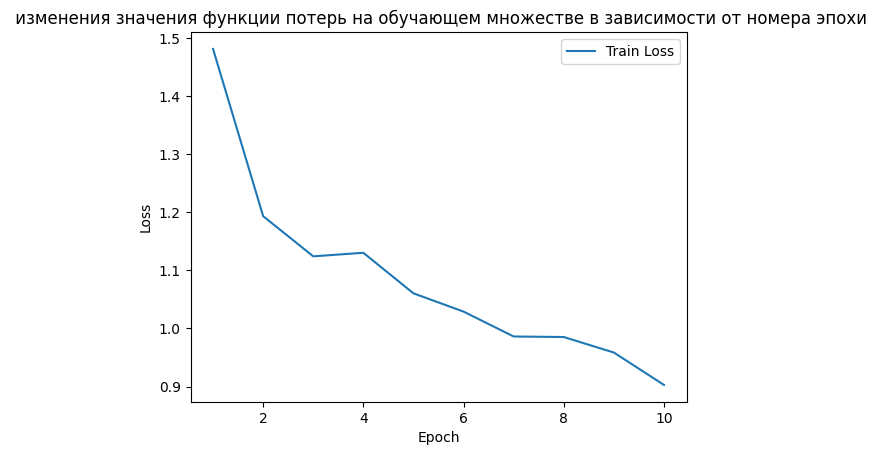

In [25]:
plt.figure()
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(' изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи')
plt.show()

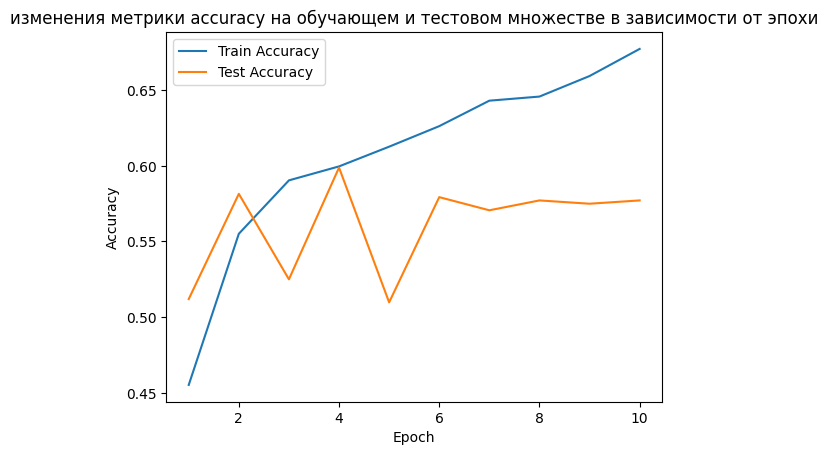

In [26]:
# Перемещение тензоров на CPU для построения графика
train_acc_cpu = [acc.cpu().numpy() for acc in train_acc_history]
val_acc_cpu = [acc.cpu().numpy() for acc in val_acc_history]


plt.figure()
plt.plot(range(1, num_epochs + 1), train_acc_cpu, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_acc_cpu, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи')
plt.show()


In [27]:
final_train_accuracy = train_acc_history[-1]
final_test_accuracy = val_acc_history[-1]
print(f'Final Train Accuracy: {final_train_accuracy:.4f}')
print(f'Final Test Accuracy: {final_test_accuracy:.4f}')

Final Train Accuracy: 0.6770
Final Test Accuracy: 0.5770


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in train_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

accuracy_train = 100 * correct / total

confusion_train = confusion_matrix(all_labels, all_predictions)
report_train = classification_report(all_labels, all_predictions, target_names=papka.classes)

print('Confusion Matrix (Train):')
print(confusion_train)
print('Classification Report (Train):')
print(report_train)

model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

accuracy_test = 100 * correct / total

confusion_test = confusion_matrix(all_labels, all_predictions)
report_test = classification_report(all_labels, all_predictions, target_names=papka.classes)

print('Confusion Matrix (Test):')
print(confusion_test)
print('Classification Report (Test):')
print(report_test)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Confusion Matrix (Train):
[[277   3   1   1  23   8]
 [ 68  59   5   3  50  23]
 [  5   2 110   2   2  17]
 [ 21   2  24  65  17  73]
 [ 64   6   2   1 136  15]
 [ 54   6  47   5  19 629]]
Classification Report (Train):
                 precision    recall  f1-score   support

        Dolphin       0.57      0.88      0.69       313
       Sea Rays       0.76      0.28      0.41       208
    Sea Urchins       0.58      0.80      0.67       138
       Seahorse       0.84      0.32      0.47       202
         Sharks       0.55      0.61      0.58       224
Turtle_Tortoise       0.82      0.83      0.82       760

       accuracy                           0.69      1845
      macro avg       0.69      0.62      0.61      1845
   weighted avg       0.72      0.69      0.67      1845



/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Confusion Matrix (Test):
[[ 58   5   1   0  10   4]
 [ 20   3   2   0  13  12]
 [  1   1  23   0   0   9]
 [  4   2   4   3   4  20]
 [ 24   8   0   0  30   9]
 [ 11   4  17   3   7 149]]
Classification Report (Test):
                 precision    recall  f1-score   support

        Dolphin       0.49      0.74      0.59        78
       Sea Rays       0.13      0.06      0.08        50
    Sea Urchins       0.49      0.68      0.57        34
       Seahorse       0.50      0.08      0.14        37
         Sharks       0.47      0.42      0.44        71
Turtle_Tortoise       0.73      0.78      0.76       191

       accuracy                           0.58       461
      macro avg       0.47      0.46      0.43       461
   weighted avg       0.55      0.58      0.54       461



Решите задачу задачу классификации, сэмплируя данные для обучения с учетом несбалансированности классов (используйте WeightedRandomSampler). Отобразите confusion matrix и classification report, рассчитанные на основе обучающего и тестового множества. В качестве веса объекта  i -го класса используйте обратную частоту этого класса.

In [31]:
from torch.utils.data import WeightedRandomSampler

In [39]:
from torch.utils.data import DataLoader

class_frequencies = [0] * len(papka.classes)

for _, label in train_loader.dataset:
    class_frequencies[label] += 1

class_weights = 1.0 / np.array(class_frequencies)

sample_weights = [class_weights[label] for _, label in train_loader.dataset]

sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

weighted_train_loader = DataLoader(train_loader.dataset, batch_size=32, sampler=sampler)

In [44]:
class_frequencies

[313, 208, 138, 202, 224, 760]

In [54]:
class_weights

array([0.00319489, 0.00480769, 0.00724638, 0.0049505 , 0.00446429,
       0.00131579])

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [43]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Переключаем модель в режим обучения
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in weighted_train_loader:  #  weighted_train_loader
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(weighted_train_loader.dataset)  # weighted_train_loader
    epoch_acc = running_corrects.double() / len(weighted_train_loader.dataset)  #  weighted_train_loader

    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} train: Loss: {epoch_loss} Acc: {epoch_acc}')

    model.eval()  # Переключаем модель в режим оценки
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = running_corrects.double() / len(test_loader.dataset)

    val_loss_history.append(epoch_loss)
    val_acc_history.append(epoch_acc)

    print(f'Epoch {epoch + 1}/{num_epochs} val: Loss: {epoch_loss} Acc: {epoch_acc}')


Epoch 1/10 train: Loss: 0.9464822349509573 Acc: 0.6547425474254742
Epoch 1/10 val: Loss: 1.151349850435319 Acc: 0.5553145336225597
Epoch 2/10 train: Loss: 0.9255110920283206 Acc: 0.6699186991869919
Epoch 2/10 val: Loss: 1.2542199661829985 Acc: 0.5249457700650759
Epoch 3/10 train: Loss: 0.9495693553107863 Acc: 0.6764227642276422
Epoch 3/10 val: Loss: 1.429333539691768 Acc: 0.46637744034707157
Epoch 4/10 train: Loss: 0.8502892281627914 Acc: 0.7046070460704607
Epoch 4/10 val: Loss: 1.2513085526137444 Acc: 0.5336225596529284
Epoch 5/10 train: Loss: 0.8389948065364911 Acc: 0.7078590785907859
Epoch 5/10 val: Loss: 1.3615595932379203 Acc: 0.5032537960954447
Epoch 6/10 train: Loss: 0.7568347550989166 Acc: 0.7382113821138211
Epoch 6/10 val: Loss: 1.2748406729832646 Acc: 0.5206073752711496
Epoch 7/10 train: Loss: 0.6697927054350938 Acc: 0.7718157181571815
Epoch 7/10 val: Loss: 1.4237837292367104 Acc: 0.4924078091106291
Epoch 8/10 train: Loss: 0.6648692766825358 Acc: 0.7658536585365854
Epoch 8/10

In [46]:
model.eval()
running_loss = 0.0
running_corrects = 0

for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)

epoch_loss = running_loss / len(test_loader.dataset)
epoch_acc = running_corrects.double() / len(test_loader.dataset)

val_loss_history.append(epoch_loss)
val_acc_history.append(epoch_acc)

print(f'Epoch {epoch + 1}/{num_epochs} val: Loss: {epoch_loss} Acc: {epoch_acc}')

Epoch 10/10 val: Loss: 1.5097089222351538 Acc: 0.46203904555314534


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()  # Переключаем модель в режим оценки
running_loss = 0.0
running_corrects = 0
all_labels = []
all_predictions = []

for inputs, labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    all_labels.extend(labels.cpu().numpy())
    all_predictions.extend(preds.cpu().numpy())

epoch_loss = running_loss / len(train_loader.dataset)
epoch_acc = running_corrects.double() / len(train_loader.dataset)

print('Confusion Matrix (Train):')
print(confusion_matrix(all_labels, all_predictions))
print('Classification Report (Train):')
print(classification_report(all_labels, all_predictions, target_names=papka.classes))


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Confusion Matrix (Train):
[[203  50   7  13  28  12]
 [  4 171   9   3  20   1]
 [  0   0 138   0   0   0]
 [  0   1   2 196   2   1]
 [  3  36   5   7 167   6]
 [ 12  26 130  61  11 520]]
Classification Report (Train):
                 precision    recall  f1-score   support

        Dolphin       0.91      0.65      0.76       313
       Sea Rays       0.60      0.82      0.70       208
    Sea Urchins       0.47      1.00      0.64       138
       Seahorse       0.70      0.97      0.81       202
         Sharks       0.73      0.75      0.74       224
Turtle_Tortoise       0.96      0.68      0.80       760

       accuracy                           0.76      1845
      macro avg       0.73      0.81      0.74      1845
   weighted avg       0.82      0.76      0.76      1845



In [55]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()  # Переключаем модель в режим оценки
running_loss = 0.0
running_corrects = 0
all_labels = []
all_predictions = []

for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    all_labels.extend(labels.cpu().numpy())
    all_predictions.extend(preds.cpu().numpy())

epoch_loss = running_loss / len(train_loader.dataset)
epoch_acc = running_corrects.double() / len(train_loader.dataset)

print('Confusion Matrix (Test):')
print(confusion_matrix(all_labels, all_predictions))
print('Classification Report (Test):')
print(classification_report(all_labels, all_predictions, target_names=papka.classes))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Confusion Matrix (Test):
[[ 27  19   3   3  16  10]
 [  2  21   3   7  13   4]
 [  1   1  26   1   0   5]
 [  1   3   7  13   3  10]
 [  5  30   1   6  25   4]
 [  2   8  41  33   6 101]]
Classification Report (Test):
                 precision    recall  f1-score   support

        Dolphin       0.71      0.35      0.47        78
       Sea Rays       0.26      0.42      0.32        50
    Sea Urchins       0.32      0.76      0.45        34
       Seahorse       0.21      0.35      0.26        37
         Sharks       0.40      0.35      0.37        71
Turtle_Tortoise       0.75      0.53      0.62       191

       accuracy                           0.46       461
      macro avg       0.44      0.46      0.42       461
   weighted avg       0.56      0.46      0.48       461

